In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support


In [3]:
# Load the dataset
data = pd.read_excel(r"D:\\Copy of finalized ml(1).xlsx")

# Select relevant columns for the analysis (adjust as per dataset requirement)
features = ['HomeTeamGoals', 'AwayTeamGoals', 'HomeTeam Form', 'AwayTeam Form']
target = 'HomeTeamName'  # Assuming classification based on HomeTeamName

# Display the first few rows of the dataset to confirm
print(data[features + [target]].head())

   HomeTeamGoals  AwayTeamGoals  HomeTeam Form  AwayTeam Form    HomeTeamName
0              4              5            1.0            1.0          France
1              0              3            2.0            1.0  Czechoslovakia
2              2              0            3.0            3.0  Czechoslovakia
3              2              1            1.0            5.0    Soviet Union
4              2              1            1.0            3.0           Spain


In [5]:
# Example for two classes: France and Yugoslavia
class1 = data[data[target] == 'FranceÂ']
class2 = data[data[target] == 'Â Yugoslavia']

# Calculate centroids
centroid1 = np.mean(class1[features], axis=0)
centroid2 = np.mean(class2[features], axis=0)

# Calculate spread (standard deviation)
spread1 = np.std(class1[features], axis=0)
spread2 = np.std(class2[features], axis=0)

# Calculate interclass distance
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

print(f"Centroid 1: {centroid1}\nCentroid 2: {centroid2}")
print(f"Spread 1: {spread1}\nSpread 2: {spread2}")
print(f"Distance between centroids: {distance_between_centroids}")

Centroid 1: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Centroid 2: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Spread 1: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Spread 2: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Distance between centroids: nan


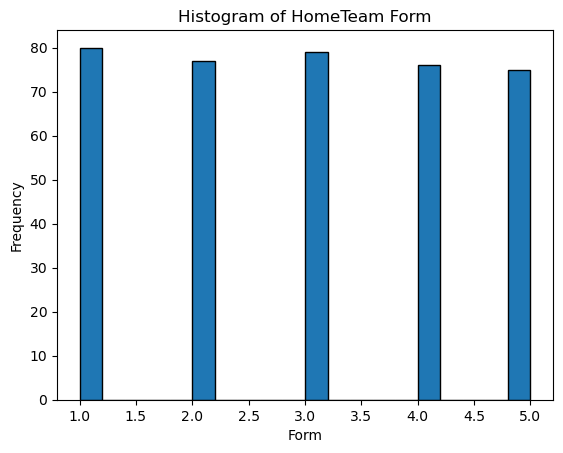

Mean: 2.9715762273901807
Variance: 1.9966081098224724


In [7]:
# Select a feature column, e.g., 'HomeTeam Form'
feature = data['HomeTeam Form']

# Plot histogram
plt.hist(feature, bins=20, edgecolor='black')
plt.title('Histogram of HomeTeam Form')
plt.xlabel('Form')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean = np.mean(feature)
variance = np.var(feature)

print(f"Mean: {mean}\nVariance: {variance}")


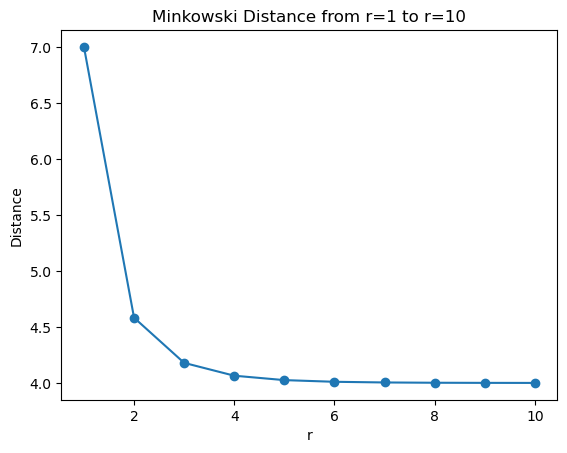

In [9]:
# Select two feature vectors (rows of data)
vector1 = data.iloc[0][features]
vector2 = data.iloc[1][features]

# Calculate Minkowski distances for r from 1 to 10
minkowski_distances = [np.linalg.norm(vector1 - vector2, ord=r) for r in range(1, 11)]

# Plot the distances
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.title('Minkowski Distance from r=1 to r=10')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()

In [11]:
# Prepare feature matrix X and labels y
X = data[features]  
y = data[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
# Evaluate accuracy on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [17]:
# Predict the classes of the test set
predictions = knn.predict(X_test)

# Print predictions
print(f"Predictions: {predictions}")


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
# Vary k from 1 to 11 and plot accuracy
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot the accuracies
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Performance Metrics: Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1_score}")

# Classification Report
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

NameError: name 'predictions' is not defined